<a href="https://colab.research.google.com/github/SebastianMelo77777/Econom-a-Internacional-/blob/main/anal%C3%ADtica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analitica

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Descomprimimos y ponemos en la carpeta principal de colab
!unzip car_price_dataset.zip -d /content/

Archive:  car_price_dataset.zip
  inflating: /content/car_price_dataset.csv  


In [ ]:
# Cargar el conjunto de datos
# Asegúrate de proporcionar la ruta correcta al archivo CSV descargado
nombre_archivo_car_price = 'car_price_dataset.csv'
data = pd.read_csv(nombre_archivo_car_price)

In [ ]:
data.head(7)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [ ]:
data.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [ ]:
df_filtrado = data[data["Price"] > 18000]
df_filtrado.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
1012,Ford,Explorer,2020,4.8,Electric,Automatic,19112,4,5,18017
1100,Toyota,Corolla,2021,4.7,Electric,Automatic,14924,5,3,18301
7221,Audi,A3,2023,5.0,Hybrid,Automatic,12234,5,5,18255


In [ ]:
df_filtrado.to_excel("carros_mayor_18000.xlsx")

In [ ]:
df_filtrado_elec = data[(data["Fuel_Type"] == "Electric")&(data["Brand"] == "Ford")&(data["Price"] > 18000)]
df_filtrado_elec.head(40)


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
1012,Ford,Explorer,2020,4.8,Electric,Automatic,19112,4,5,18017


In [ ]:
df_filtrado_electrico_mayor_18000 = data[(data["Fuel_Type"] == "Electric")&(data["Price"] > 18000)]

# random forest

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Codificar variables categóricas, dummies
data = pd.get_dummies(data, drop_first=True)
data

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2012,2.0,5356,2,3,12092,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2020,4.2,231440,4,2,11171,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2023,2.0,160971,2,1,11780,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,2003,2.6,286618,3,3,2867,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9996,2002,1.4,168000,2,1,6240,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
9997,2010,3.0,86664,5,1,9866,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9998,2002,1.4,225772,4,1,4084,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Definir las características independientes (X) y la variable objetivo/dependiente (y)
X = data.drop('Price', axis=1) # Con lo que voy a entrenar mi Random Forest
y = data['Price'] # lo que quiero predecir
X.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2012,2.0,5356,2,3,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2020,4.2,231440,4,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2023,2.0,160971,2,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,2003,2.6,286618,3,3,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
X.columns

Index(['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Brand_BMW',
       'Brand_Chevrolet', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_Kia', 'Brand_Mercedes', 'Brand_Toyota', 'Brand_Volkswagen',
       'Model_5 Series', 'Model_A3', 'Model_A4', 'Model_Accord',
       'Model_C-Class', 'Model_CR-V', 'Model_Camry', 'Model_Civic',
       'Model_Corolla', 'Model_E-Class', 'Model_Elantra', 'Model_Equinox',
       'Model_Explorer', 'Model_Fiesta', 'Model_Focus', 'Model_GLA',
       'Model_Golf', 'Model_Impala', 'Model_Malibu', 'Model_Optima',
       'Model_Passat', 'Model_Q5', 'Model_RAV4', 'Model_Rio', 'Model_Sonata',
       'Model_Sportage', 'Model_Tiguan', 'Model_Tucson', 'Model_X5',
       'Fuel_Type_Electric', 'Fuel_Type_Hybrid', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Transmission_Semi-Automatic'],
      dtype='object')

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
# Realizar predicciones
y_pred = rf_model.predict(X_test)

In [ ]:
X_test.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic
6252,2005,1.2,257760,5,5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4684,2013,2.9,111790,5,3,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1731,2011,5.0,13473,5,4,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4742,2007,3.8,133298,4,5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4521,2012,1.3,18611,3,5,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
y_pred

array([ 2797.04, 10557.6 , 12914.16, ...,  7690.4 ,  5890.86, 10902.5 ])

In [ ]:
y_test

,Price
6252,2000
4684,11164
1731,14630
4742,7334
4521,10127
...,...
6412,4681
8285,12839
7853,8124
1095,6709


In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

RMSE: 555.3064737591307
R^2: 0.966437571330785


#clasificacion
##regresion logistica

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
!unzip breast_cancer_dataset.zip -d /content/

Archive:  breast_cancer_dataset.zip
  inflating: /content/Breast_Cancer.csv  


In [ ]:
df_cancer = pd.read_csv('Breast_Cancer.csv')
df_cancer.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
df_cancer.Status.unique()

array(['Alive', 'Dead'], dtype=object)

In [ ]:
df_cancer.shape

(4024, 16)

In [ ]:
#objetos puede ser cadena de texto o mezclados
df_cancer.dtypes

,0
Age,int64
Race,object
Marital Status,object
T Stage,object
N Stage,object
6th Stage,object
differentiate,object
Grade,object
A Stage,object
Tumor Size,int64


In [ ]:
categoricals = df_cancer.select_dtypes(include=[object])
categoricals

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
1,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
2,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,Alive
3,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
4,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,Positive,Positive,Alive
...,...,...,...,...,...,...,...,...,...,...,...
4019,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
4020,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
4021,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Negative,Alive
4022,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Positive,Alive


In [ ]:
for cat in categoricals:
  print(f"{cat},{df_cancer[cat].nunique()}")

Race,3
Marital Status,5
T Stage ,4
N Stage,3
6th Stage,5
differentiate,4
Grade,4
A Stage,2
Estrogen Status,2
Progesterone Status,2
Status,2


([0, 1, 2, 3],
 [Text(0, 0, 'Poorly differentiated'),
  Text(1, 0, 'Moderately differentiated'),
  Text(2, 0, 'Well differentiated'),
  Text(3, 0, 'Undifferentiated')])

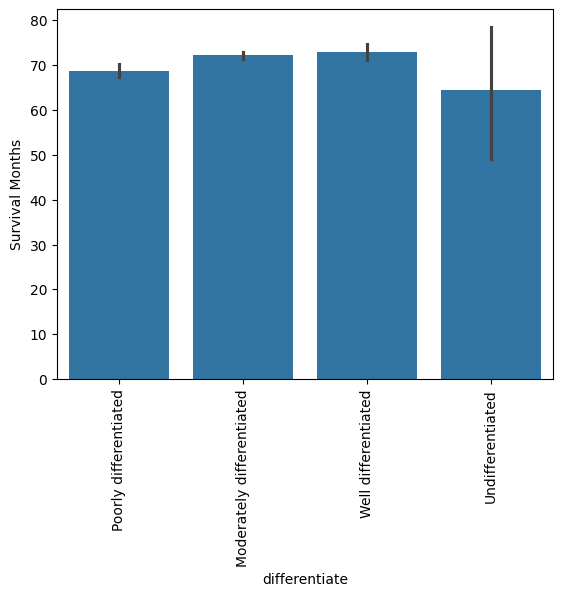

In [ ]:
#graficar
sns.barplot(x='differentiate',y='Survival Months',data=df_cancer)
plt.xticks(rotation=90)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categoricals_encoded = categoricals.copy()
for col in categoricals.columns:
  label_encoder = LabelEncoder()
  categoricals_encoded[col] = label_encoder.fit_transform(categoricals[col])


In [ ]:
categoricals_encoded

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,2,1,0,0,0,1,3,1,1,1,0
1,2,1,1,1,2,0,2,1,1,1,0
2,2,0,2,2,4,0,2,1,1,1,0
3,2,1,0,0,0,1,3,1,1,1,0
4,2,1,1,0,1,1,3,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4019,1,1,0,0,0,0,2,1,1,1,0
4020,2,0,1,1,2,0,2,1,1,1,0
4021,2,1,1,0,1,0,2,1,1,0,0
4022,0,0,1,0,1,0,2,1,1,1,0


In [ ]:
df_cancer_dropped = df_cancer.drop(columns = categoricals.columns)

In [ ]:
df_cancer_nuevo = pd.concat([df_cancer_dropped,categoricals_encoded],axis=1)


In [ ]:
df_cancer_nuevo.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,68,4,24,1,60,2,1,0,0,0,1,3,1,1,1,0
1,50,35,14,5,62,2,1,1,1,2,0,2,1,1,1,0
2,58,63,14,7,75,2,0,2,2,4,0,2,1,1,1,0
3,58,18,2,1,84,2,1,0,0,0,1,3,1,1,1,0
4,47,41,3,1,50,2,1,1,0,1,1,3,1,1,1,0


In [ ]:
X = df_cancer_nuevo.drop(columns='Status')# Variables independientes
y = df_cancer_nuevo.Status # Variable objetivo Status
X.head(2)

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status
0,68,4,24,1,60,2,1,0,0,0,1,3,1,1,1
1,50,35,14,5,62,2,1,1,1,2,0,2,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(2816, 15)

In [ ]:
X.shape

(4024, 15)

In [ ]:
X_test.shape

(1208, 15)

In [ ]:
y_train.shape

(2816,)

In [ ]:
y_test.shape

(1208,)

In [ ]:
log_reg = LogisticRegression(random_state=42).fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_train


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status
3841,62,16,18,6,67,2,1,0,1,2,1,3,1,1,1
1511,55,50,13,10,53,2,3,1,2,4,0,2,1,1,1
1717,49,20,6,1,56,2,1,0,0,0,0,2,1,1,1
226,59,57,20,9,60,2,1,2,1,2,0,2,1,1,1
2872,64,83,8,2,35,2,1,2,0,2,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,63,15,17,1,52,2,1,0,0,0,0,2,1,0,0
1294,46,20,6,2,58,2,1,0,0,0,0,2,1,1,1
860,57,22,31,2,45,2,3,1,0,1,3,1,1,1,1
3507,48,28,27,1,102,1,1,1,0,1,1,3,1,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_normalizado = scaler.fit_transform(X_train)
X_test_normalizado = scaler.fit_transform(X_test)


In [ ]:
from logging import log
log_reg = LogisticRegression(random_state=42).fit(X_train_normalizado,y_train)


log_reg.predict_proba(X_test_normalizado)


array([[0.98114778, 0.01885222],
       [0.82147451, 0.17852549],
       [0.84016226, 0.15983774],
       ...,
       [0.8324881 , 0.1675119 ],
       [0.25927121, 0.74072879],
       [0.72850329, 0.27149671]])

In [ ]:
y_scores = log_reg.predict_proba(X_test_normalizado)[:,1]

In [ ]:
predicciones = log_reg.predict(X_test_normalizado)
predicciones

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1033
           1       0.75      0.46      0.57       175

    accuracy                           0.90      1208
   macro avg       0.83      0.72      0.76      1208
weighted avg       0.89      0.90      0.89      1208



In [ ]:
y_test[y_test == 0].count()

np.int64(1033)

In [ ]:
y_test[y_test == 1].count()

np.int64(175)

Text(0.5, 1.0, 'Curva ROC')

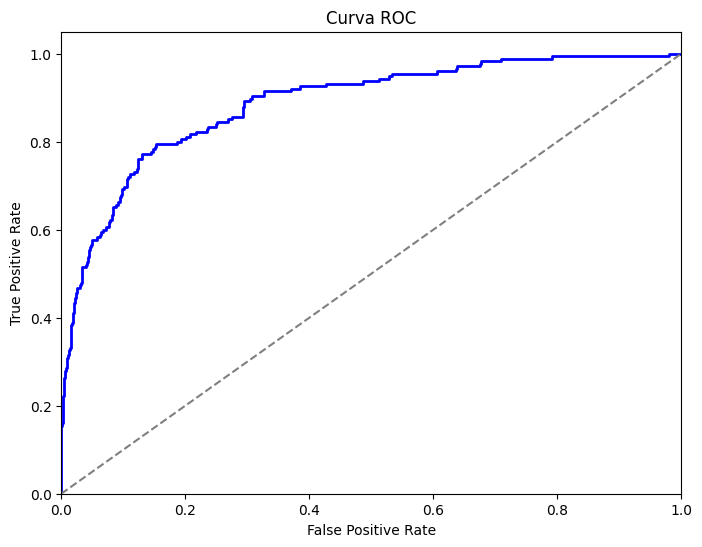

In [ ]:
# Calcular FPR, TPR y AUC
fpr,tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")


#Series de tiempo

In [ ]:
from sklearn.metrics import roc_curve, auc # métricas
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
import seaborn as sns # gráficas, similar matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
!unzip superstore_sales.zip -d /content/

Archive:  superstore_sales.zip
  inflating: /content/train.csv      


In [ ]:
df_sales = pd.read_csv('train.csv')

In [ ]:
df_sales.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Mejor mantener las 11 filas porque el codigo postal puede no ser una variable tan relevante. Ademas tenemos un dataset grande de 9800 registros.
df_sales['Postal Code'] = df_sales['Postal Code'].fillna(df_sales['Postal Code'].mean())

In [ ]:
df_sales.columns = df_sales.columns.str.lower().str.replace(" ","_")

In [ ]:
df_sales.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [ ]:
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'],  format='%d/%m/%Y')

In [ ]:
df_sales.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='object')

In [ ]:
# Extract year and month from order date

df_sales['year'] = df_sales['order_date'].dt.year
df_sales['month'] = df_sales['order_date'].dt.month

# Sales over time (monthly)
monthly_sales = df_sales.groupby(['year', 'month'])['sales'].sum()#.reset_index()
monthly_sales = monthly_sales.reset_index()

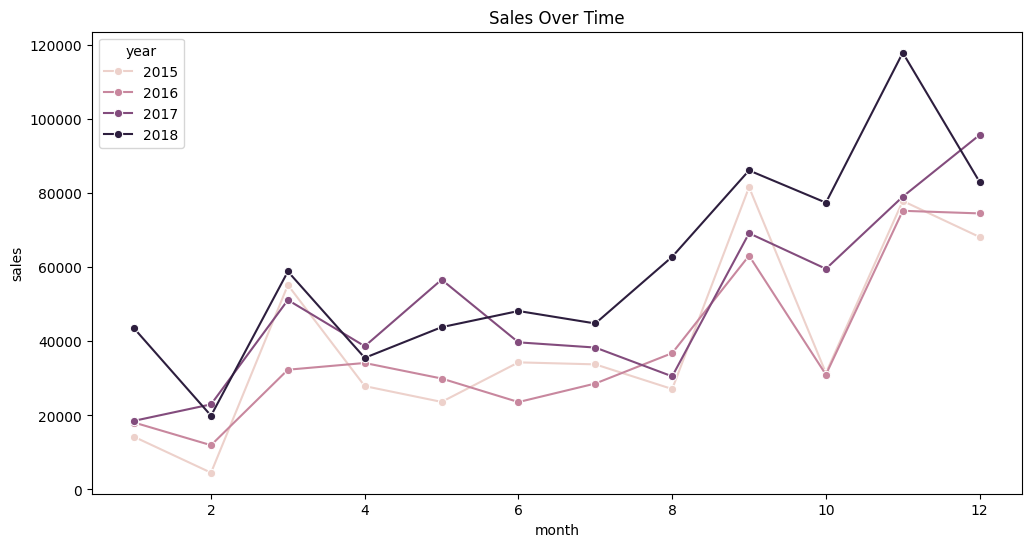

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='sales', data=monthly_sales, hue='year', marker='o')
plt.title('Sales Over Time')
plt.show()

In [ ]:
monthly_sales.head(2)

,year,month,sales
0,2015,1,14205.707
1,2015,2,4519.892


In [ ]:
# Agrupamos por días para que no se repitan
df_agrupado = df_sales.groupby('order_date')['sales'].sum().reset_index()

In [ ]:
df_mensual = df_agrupado.groupby(pd.Grouper(key='order_date', freq='MS'))['sales'].sum().reset_index()

In [ ]:
df_mensual

,order_date,sales
0,2015-01-01,14205.7070
1,2015-02-01,4519.8920
2,2015-03-01,55205.7970
3,2015-04-01,27906.8550
4,2015-05-01,23644.3030
5,2015-06-01,34322.9356
6,2015-07-01,33781.5430
7,2015-08-01,27117.5365
8,2015-09-01,81623.5268
9,2015-10-01,31453.3930


In [ ]:
from datetime import datetime
from prophet import Prophet
# Crear DataFrame compatible con Prophet
df_mensual.columns = ["ds", "y"]

#Train/test split
split_date = datetime(2018,1,1)
train = df_mensual.loc[df_mensual.ds <= split_date].copy()
test = df_mensual.loc[df_mensual.ds > split_date].copy()

In [ ]:
df_result = train.set_index("ds").join(test.set_index("ds"), how='outer', lsuffix="train", rsuffix="test")

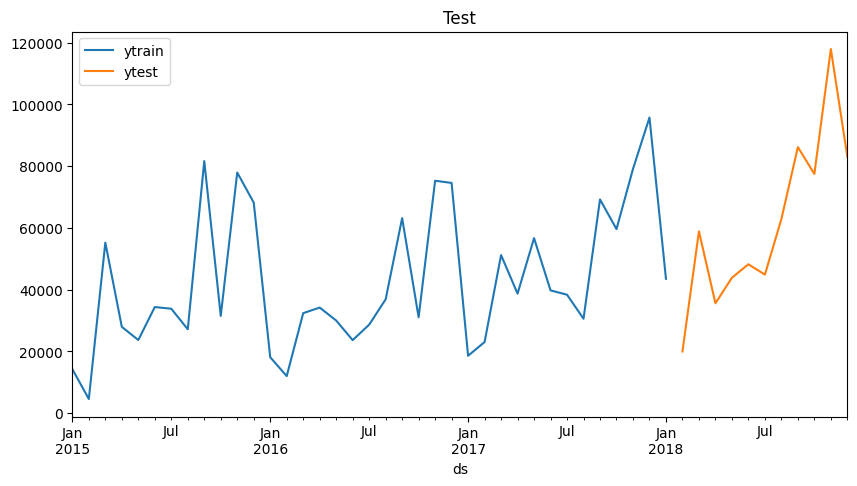

In [ ]:
df_result.plot(figsize=(10, 5), title='Test', style='-', ms=5)
plt.show()

In [ ]:
# Modelo Prophet
modelo_prophet = Prophet()
modelo_prophet.fit(train)

# Predict on test set with model
prediccion = modelo_prophet.predict(test)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6kin4e81/8lpmogar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6kin4e81/bdo8qscu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30741', 'data', 'file=/tmp/tmp6kin4e81/8lpmogar.json', 'init=/tmp/tmp6kin4e81/bdo8qscu.json', 'output', 'file=/tmp/tmp6kin4e81/prophet_modelk12mznma/prophet_model-20250409173616.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:36:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:36:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


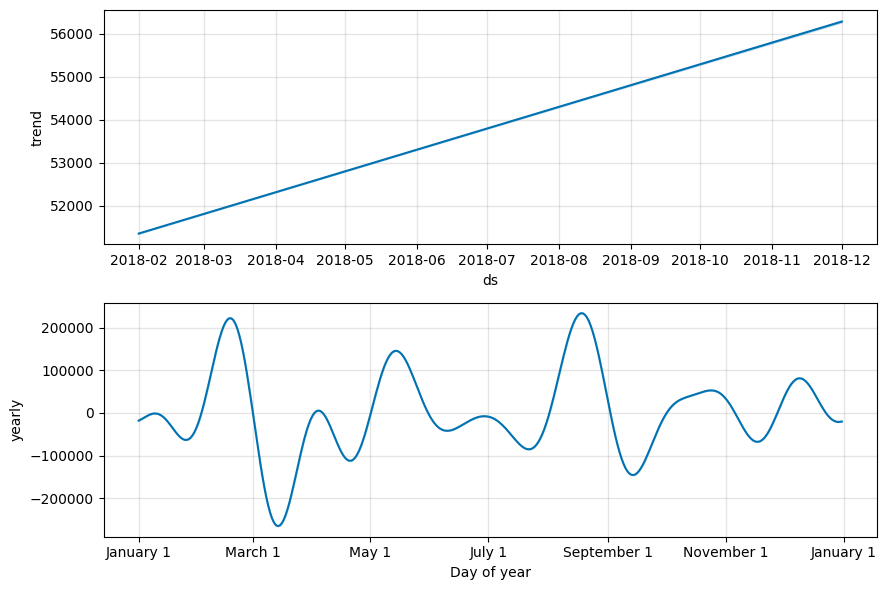

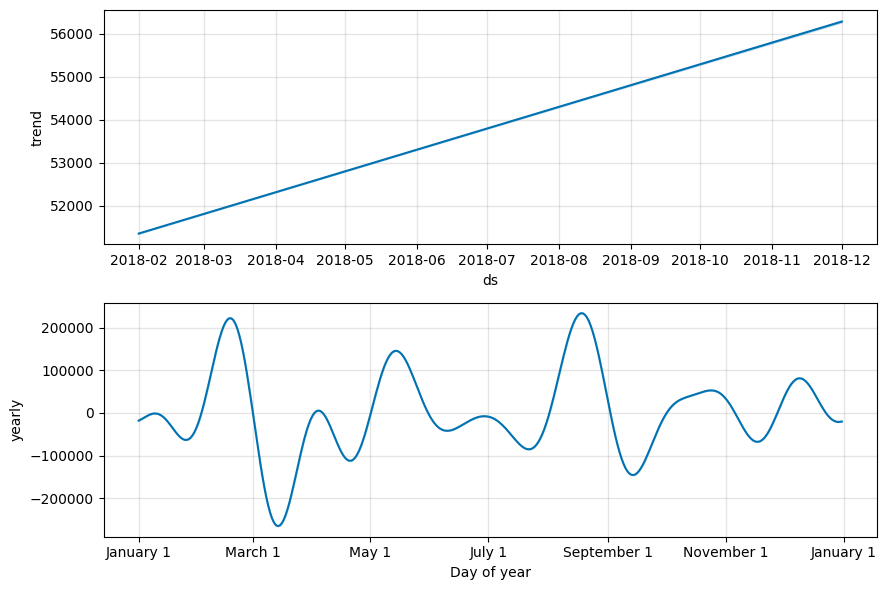

In [ ]:
modelo_prophet.plot_components(prediccion)

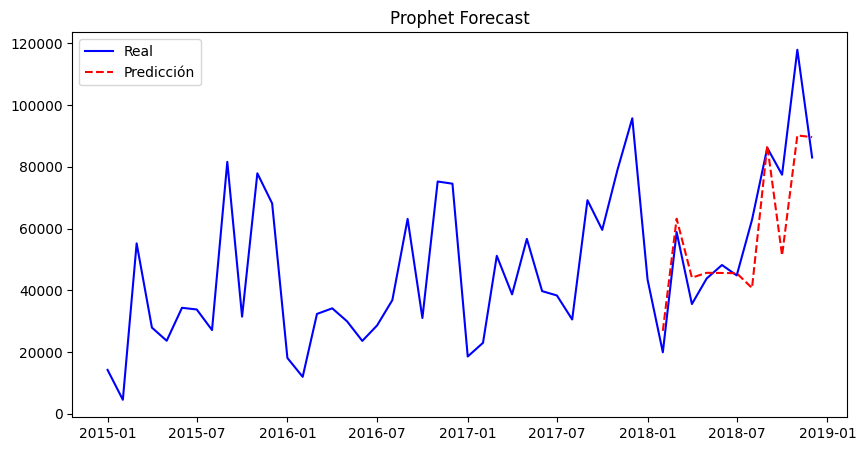

In [ ]:
# Visualización
fig, ax = plt.subplots(figsize=(10, 5))

# Datos reales
ax.plot(df_mensual['ds'], df_mensual['y'], label='Real', color='blue')

# Predicción
ax.plot(prediccion['ds'], prediccion['yhat'], label='Predicción', color='red', linestyle='--')

ax.set_title('Prophet Forecast')
ax.legend() # Mostrar la leyenda para identificar las líneas
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
error_porcentual = mean_absolute_percentage_error(test["y"],prediccion["yhat"])
print("El error porcentual es de {:.2%}".format(error_porcentual))

El error porcentual es de 16.26%


#Optimizacion

In [ ]:
#instalar libreria
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 71.7 MB/s eta 0:00:00


In [ ]:
#de pulp importamos todo
from pulp import *

MAXIMIZAR   

prob = 10x_1 + 20x_2


Sujeto a las siguientes restricciones:

-x_1 + 2x_2 <= 15


-x_1 + x_2 <= 12


5x_1 + 3x_2 <= 45


x_1, x_2 >=0


In [ ]:
#Inicializar PL
prob = LpProblem('Problem_1',LpMaximize)

#Variables de decisión
x = LpVariable.dicts('x',[1,2],lowBound=0,cat='Continuous')

print(x)

{1: x_1, 2: x_2}


In [ ]:
# Función objetivo
prob += 10*x[1] + 20*x[2]

print(prob)


Problem_1:
MAXIMIZE
10*x_1 + 20*x_2 + 0
VARIABLES
x_1 Continuous
x_2 Continuous



In [ ]:
# Restricciones
prob += -x[1] + 2*x[2] <= 15
prob += x[1] + x[2] <= 12
prob += 5*x[1] + 3*x[2] <= 45

'''
No se agrega la restricción de que x_1 y x_2 son positivos
porque al crear las variables x arriba se especificó que el límite in
'''

'\nNo se agrega la restricción de que x_1 y x_2 son positivos\nporque al crear las variables x arriba se especificó que el límite in\n'

In [ ]:
# Resolver el problema
status = prob.solve()
print(LpStatus[status])

Optimal


In [ ]:
# Mostrar variables
for var in prob.variables():
    print(f'{var.name} = {var.varValue}')

x_1 = 3.0
x_2 = 9.0


#ejercicio
Un gerente de producción tiene a cargo 2 plantas de producción en donde se fabrica alimentos. La empresa quiere empezar a fabricar dos nuevos tipos de torta, la de chocolate y la de arequipe. Se venderán a 10 dólares y 15 dólares respectivamente.

En la planta 1 se tiene una tasa de producción de 50 unidades/hora para la torta de chocolate mientras que se tiene una tasa de 40 unidades/hora para la de arequipe. En la planta 2 se tiene una tasa de producción de 40 unidades/hora para la de chocolate y 25 unidades/hora para la de arequipe.

La disponibilidad que se tiene al mes en cada planta es diferente debido a que requieren diferentes mantenimientos programados y hay diferentes cantidades de empleados. Por lo tanto, las horas disponibles en la planta 1 son 500 y en la 2, 700.
El gerente debe escoger una sola planta para realizar la fabricación.

¿Cómo se puede maximizar las ganancias utilizando programación lineal entera mixta?


50 unds/h + 40 unds/h <= 500 h INCORRECTO

t -> variable binaria qie nos dice si la planta se usa o no

R1 -> 1/50 * Xc h/und + 1/40 * X_a und/h + t VALOR MUY GRANDE <= 500 CORRECTO

R2 -> 1/40 * Xc h/und + 1/25 * X_a und/h  + (t-1) VALOR MUY GRANDE<= 700

FO -> 10 * X_c + 15 * X_a -> Ganancia Total


In [ ]:
# Definir el modelo de optimización
model = LpProblem("Maximizar_ganancias_tortas", LpMaximize)


In [ ]:
# Variables de decisión
x_c = LpVariable("Tortas_chocolate", lowBound=0, cat="Integer")  # Unidades de torta de chocolate
x_a = LpVariable("Tortas_arequipe", lowBound=0, cat="Integer")    # Unidades de torta de arequipe
t = LpVariable("Planta_1", cat="Binary")  # 1 si se elige la planta 1, 0 si no
M = 9999 # VALOR MUY GRANDE

In [ ]:
#funcion de objetivo
model += 10 * x_c + 15 * x_a, "Ganancia total"


In [ ]:
# Restricciones de capacidad de producción según la planta elegida
model += x_c * 1/50 + x_a * 1/40 + M * t <= 500 , "Capacidad_Planta_1"
model += x_c * 1/40 + x_a * 1/25 + M * (t-1) <= 700 , "Capacidad_Planta_2"

In [ ]:
#resolver el modelo
model.solve()

1

In [ ]:
# Resultados
print("Estado de optimización:", model.status)
print("Tortas de Chocolate a producir:", x_c.varValue)
print("Tortas de Arequipe a producir:", x_a.varValue)
print("Ganancia total:", model.objective.value())
print("Planta seleccionada:", "Planta 2" if t.varValue == 1 else "Planta 1")


Estado de optimización: 1
Tortas de Chocolate a producir: 0.0
Tortas de Arequipe a producir: 20000.0
Ganancia total: 300000.0
Planta seleccionada: Planta 1
